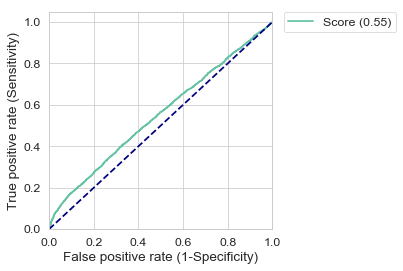

SpearmanrResult(correlation=-0.0681159607391838, pvalue=0.00011573523231670192)

In [2]:
import pandas as pd
import sys

sys.path.append('/home/bikash/Documents/Solubility/For_upload/Solubility/')

import functions

#Datasets
pET = pd.read_pickle('/home/bikash/Documents/Solubility/For_upload/Solubility/results/pET_complete.pkl.gz', compression='infer')
ecoli_w3110 = pd.read_pickle('/home/bikash/Documents/Solubility/For_upload/Solubility/results/ecoli.pkl.gz', compression='infer')
pET['Accession'] = pET['Accession'].apply(lambda x:x.split('_')[0])


wilkinson_pET21 = pd.read_csv('wilkinson_sol_pET21_NESG.txt', sep='\t', header=None)
wilkinson_pET15 = pd.read_csv('wilkinson_sol_pET15_NESG.txt', sep='\t', header=None)
wilkinson_ecoli = pd.read_csv('wilkinson_ecoli_W3110_tags.txt', sep='\t', header=None)

#merge pET
wilkinson_pET = pd.concat([wilkinson_pET15, wilkinson_pET21])


#Rename cols
wilkinson_pET = wilkinson_pET.rename(columns={0:'Accession', 1:'Score'})
wilkinson_ecoli = wilkinson_ecoli.rename(columns={0:'JW', 1:'Score'})

wilkinson_pET.shape, pET.shape, ecoli_w3110.shape, wilkinson_ecoli.shape

#merge results with cleaned dataset
df_pET = pET.merge(wilkinson_pET, on="Accession")
df_ecoli = ecoli_w3110.merge(wilkinson_ecoli, on="JW")


#ROC for pET

df = df_pET[['Score']].copy()

labels = df_pET['Solubility'].values
functions.make_roc(df, labels)

#Correlation for ecoli
from scipy.stats import spearmanr

spearmanr(df_ecoli['Score'], df_ecoli['Solubility(%)'])

In [3]:
df_pET.shape, df_ecoli.shape

((12216, 6), (3198, 6))